In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import parquet
import os

from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from os import mkdir, listdir
from os.path import join
import numpy as np
from pickle import load, dump


pd.set_option('display.max_columns', 200)

In [2]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
filename = pd.read_csv(r"C:\Users\tyler\OneDrive\Desktop\PhD Stuff\STA 6366\Final Project\FinalData.csv")

In [4]:
filename.shape

(9961, 1578)

In [5]:
filename.head()

,Unnamed: 0,appid,Name,release_date,Single-player,Online Co-op,Shared/Split Screen Co-op,Steam Achievements,Full controller support,Steam Trading Cards,Captions available,Steam Workshop,Steam Cloud,Stats,Includes level editor,Commentary available,Remote Play on Phone,Remote Play on TV,Remote Play Together,dev_Valve,tag_Platformer,tag_Puzzle,tag_Dark Humor,tag_First-Person,tag_Story Rich,genre_Action,genre_Adventure,tag_Sandbox,tag_Gore,tag_Physics,tag_Blood,tag_Violent,genre_Casual,genre_Indie,genre_Simulation,tag_Action Roguelike,tag_Bullet Hell,tag_Pixel Graphics,tag_Roguelite,tag_2D,genre_RPG,LAN Co-op,tag_Farming Sim,tag_Life Sim,tag_Multiplayer,tag_RPG,dev_Supergiant Games,tag_Hack and Slash,tag_Indie,tag_Action,Partial Controller Support,Includes Source SDK,tag_Puzzle Platformer,tag_3D Platformer,tag_Singleplayer,Online PvP,pub_Re-Logic,tag_Open World Survival Craft,tag_Survival,tag_Colony Sim,tag_Base Building,tag_Strategy,genre_Strategy,Tracked Controller Support,tag_FPS,tag_Horror,tag_Female Protagonist,Valve Anti-Cheat enabled,tag_Zombies,tag_Co-op,tag_Shooter,Profile Features Limited,tag_Anime,tag_Cute,pub_Innersloth,tag_Funny,tag_Multiple Endings,tag_Choose Your Own Adventure,tag_Memes,tag_Comedy,dev_SCS Software,tag_Driving,tag_Transportation,tag_Simulation,tag_Open World,tag_Automobile Sim,tag_Great Soundtrack,tag_2D Platformer,tag_Fast-Paced,tag_Cartoony,pub_New Blood Interactive,tag_Early Access,tag_Arena Shooter,tag_Spectacle fighter,tag_Character Action Game,genre_Early Access,Steam Leaderboards,tag_Roguelike Deckbuilder,tag_Card Game,tag_Card Battler,...,dev_Microblast Games,"dev_Dejobaan Games, LLC",dev_NetEase Games,dev_Dovetail Games,dev_Lighthouse Games Studio,dev_430Games,dev_OfficialAndy,dev_stillalive studios,pub_Atomic Fabrik,pub_Petroglyph,dev_D'Avekki Studios Ltd,dev_FreezeNova,pub_Gaming Factory,pub_Bossa Studios,dev_owlyboi,tag_Real-Time,pub_Enlight Software Limited,dev_IllFonic,dev_KT Racing,dev_Ubisoft Paris,pub_Born Ready Games,"pub_Idle System, Inc.",pub_IndieGala,pub_Gaijin Distribution KFT,dev_Twilight Sonata Studio,pub_All in! Games,dev_Cyanide Studios,dev_Funatics Software,dev_Ascaron Entertainment ltd.,pub_GameMill Entertainment,dev_Whale Rock Games,dev_Snowbird Games,pub_AFBIK Studio,pub_Ubisoft Entertainment,dev_Cryptic Studios,"dev_BadFly Interactive, a.s.",dev_Pocketpair,dev_Pearl Abyss,dev_Toadman Interactive,dev_Cheesecake Dev,pub_Black Forest Games,pub_Klabater,dev_Cleversan Games,dev_tri-Ace,tag_Voice Control,dev_Digital Happiness,pub_Star Drifters,dev_▲ Pyramid Games,pub_Pyramid Games S.A.,dev_Spiders,dev_Frima Studio,pub_Phoenix Games,dev_Dharker Studio,dev_Ubisoft Shanghaï,dev_Triangle Studios,dev_Deck13,pub_VALOFE,dev_City Interactive,pub_Tribute Games Inc.,dev_Reverie World Studios,dev_Zloy Krot Studio,dev_BambuseaeGames,pub_DigitalDream,pub_MY.GAMES,dev_Reality Pump Studios,dev_The Chinese Room,dev_TML-Studios,pub_KISS ltd,dev_N3V Games,dev_Gremlin Interactive,pub_Nutaku Publishing,dev_Circle Poison,dev_Furry Tails,dev_Labyrinthine,pub_Nexon America Inc.,dev_Romantic Room,dev_Ironward,dev_Racing Bros,naccus,esrb_ao,esrb_e,esrb_e10,esrb_ec,esrb_m,esrb_rp,esrb_t,ln.Pos_Reviews,ln.dlcp1,ln.curatorsp1,ln.steam_achievementsp1,ln.PaidDLCsp1,ln.totDLCPricep1,ln.numUpdatesp1,hasLastUpdateTimestamp,ln.pricep1,ln.fullAudiop1,ln.interfacep1,ln.subtitlesp1,ln.all-time_peak_ccu,ln.last_30_days_avg_ccu
0,0,620,Portal 2,1.303085e+09,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,Fal

In [8]:
df_corr = filename[['ln.Pos_Reviews', 'ln.all-time_peak_ccu', 'ln.last_30_days_avg_ccu', 
                       'ln.totDLCPricep1', 'ln.pricep1', 'ln.subtitlesp1', 'ln.interfacep1', 'ln.steam_achievementsp1',
             'ln.fullAudiop1', 'ln.numUpdatesp1', 'ln.curatorsp1']].dropna().corr()
df_corr

,ln.Pos_Reviews,ln.all-time_peak_ccu,ln.last_30_days_avg_ccu,ln.totDLCPricep1,ln.pricep1,ln.subtitlesp1,ln.interfacep1,ln.steam_achievementsp1,ln.fullAudiop1,ln.numUpdatesp1,ln.curatorsp1
ln.Pos_Reviews,1.000000,0.770772,0.740836,0.241810,0.154378,0.131502,0.283249,0.161443,0.164198,0.174878,0.776721
ln.all-time_peak_ccu,0.770772,1.000000,0.757177,0.265592,0.211467,0.159430,0.283100,0.243991,0.165718,0.218526,0.594209
ln.last_30_days_avg_ccu,0.740836,0.757177,1.000000,0.263327,0.217211,0.111546,0.284029,0.147239,0.125007,0.273277,0.484103
ln.totDLCPricep1,0.241810,0.265592,0.263327,1.000000,0.220444,0.113361,0.148505,0.232252,0.061824,0.168952,0.234468
ln.pricep1,0.154378,0.211467,0.217211,0.220444,1.000000,0.195344,0.192354,0.246902,0.080471,0.067568,0.397778
ln.subtitlesp1,0.131502,0.159430,0.111546,0.113361,0.195344,1.000000,0.540868,0.236610,0.411664,-0.020216,0.177072
ln.interfacep1,0.283249,0.283100,0.284029,0.148505,0.192354,0.540868,1.000000,0.269464,0.331704,0.071527,0.288595
ln.steam_achievementsp1,0.161443,0.243991,0.147239,0.232252,0.246902,0.236610,0.269464,1.000000,0.129386,0.166708,0.259554
ln.fullAudiop1,0.164198,0.165718,0.125007,0.061824,0.080471,0.411664,0.331704,0.129386,1.000000,-0.082971,0.143074
ln.numUpdatesp1,0.174878,0.218526,0.273277,0.168952,0.067568,-0.020216,0.071527,0.166708,-0.082971,1.000000,0.071082


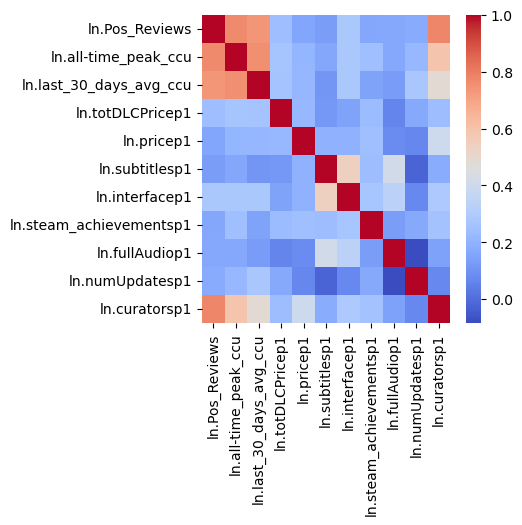

In [16]:
plt.figure(figsize=(4,4)) 
sns.heatmap(df_corr, annot=False, cmap = 'coolwarm')
# plt.savefig('correlation.png', bbox_inches="tight")

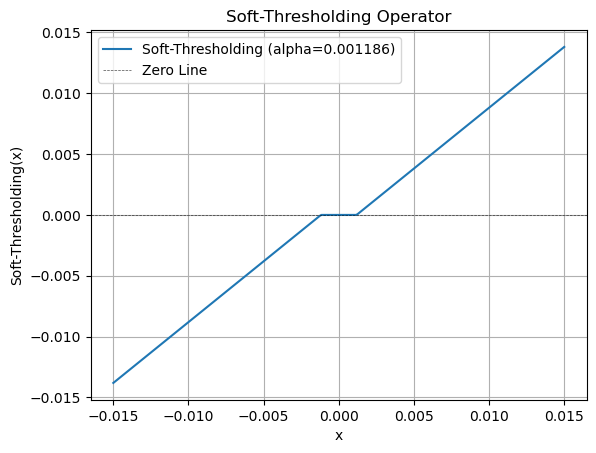

In [22]:
def soft_thresholding(x, alpha):
    return np.sign(x) * np.maximum(np.abs(x) - alpha, 0)

# Generate a range of values for x
x_values = np.linspace(-0.015, 0.015, 300)

# Set your optimal alpha value
optimal_alpha = 0.001186

# Calculate soft-thresholding values for each x
y_values = soft_thresholding(x_values, optimal_alpha)

# Plot the soft-thresholding operator
plt.plot(x_values, y_values, label=f'Soft-Thresholding (alpha={optimal_alpha:.6f})')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--', alpha=0.7, label='Zero Line')
plt.xlabel('x')
plt.ylabel('Soft-Thresholding(x)')
plt.title('Soft-Thresholding Operator')
plt.legend()
plt.grid(True)
# plt.savefig('soft-thresholding.png', bbox_inches="tight")
plt.show()

In [95]:
all_coeffs

,Feature,Coefficient
0,release_date,0.147343
1,Single-player,0.155869
2,Online Co-op,-0.004941
3,Shared/Split Screen Co-op,0.105082
4,Steam Achievements,-0.026560
...,...,...
1569,ln.fullAudiop1,-0.007404
1570,ln.interfacep1,0.031238
1571,ln.subtitlesp1,0.059693
1572,ln.all-time_peak_ccu,0.012102


In [96]:
selected_features = all_coeffs[all_coeffs['Coefficient'] != 0]

In [105]:
all_coeffs

,Feature,Coefficient
0,release_date,0.147343
1,Single-player,0.155869
2,Online Co-op,-0.004941
3,Shared/Split Screen Co-op,0.105082
4,Steam Achievements,-0.026560
...,...,...
1569,ln.fullAudiop1,-0.007404
1570,ln.interfacep1,0.031238
1571,ln.subtitlesp1,0.059693
1572,ln.all-time_peak_ccu,0.012102


In [71]:
all_coeffs = pd.read_parquet('./AllCoefficients.parquet', engine = 'fastparquet')

In [72]:
coefs_df_filtered = all_coeffs[all_coeffs['Coefficient'] != 0]

In [86]:
coefs_df_filtered_sorted_filtered = coefs_df_filtered_sorted[~coefs_df_filtered_sorted['Feature'].str.contains('dev_|pub_')]
print(coefs_df_filtered_sorted_filtered)

                                Feature  Coefficient
1519                  tag_Voice Control     0.834572
1240                        tag_Archery     0.687734
1254                           tag_Pool     0.537271
1563                      ln.curatorsp1     0.472548
778                          tag_Tennis     0.399504
...                                 ...          ...
1271                     tag_Werewolves    -0.618809
1320                           tag_Snow    -0.748576
68             Profile Features Limited    -0.993886
116                    tag_Free to Play    -1.346809
803   Steam is learning about this game    -1.470896

[368 rows x 2 columns]


In [ ]:
#why is negative reviews, total reviews, and metacritic not in this new dataset

In [5]:
def addStats(stats, name, var):
    stats[name + "_median"] = var.median()
    stats[name + "_iqr"] = var.astype(np.float64).quantile(.75) - var.astype(np.float64).quantile(.25)

def getStats(X_train, X_test):
    stats = {}
    addStats(stats, "X_train", X_train)
    addStats(stats, "X_test", X_test)
    
    return stats

    
def get_train_environment(n_splits = 20, filename = r"C:\Users\tyler\OneDrive\Desktop\PhD Stuff\STA 6366\Final Project\FinalData.csv", seed=4321):
    cachedFolds = False
    cachedData = False
    # If you wish to delete the cache, please delete the entire cache folder
    if "cache" in listdir():
        cachedData = True
        if str(n_splits) + ".pickle" in listdir("cache"):
            print("Found cached folds, using those")
            cachedFolds = True
        else:
            print("No cached folds found, generating new folds.")
    else:
        print("No cache found, generating holdout set and folds.")
    
    if cachedData == False:
        data = None
        try:
            data = pd.read_csv(filename)
            data = data.drop("Unnamed: 0", axis=1)
        except:
            print(f"Error, unable to read file {filename}, you can provide the filename via filename = <filename>")
            exit()
        
        data = data.drop(["Name", "appid"], axis=1)

        pipeline = Pipeline([("imputer", SimpleImputer(strategy="median")), ("scaler", RobustScaler())])

        X = data.drop("ln.pricep1", axis=1)
        y = data["ln.pricep1"]

        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, shuffle=True, test_size=0.05)

        X_train_scaled = pipeline.fit_transform(X_train)
        X_test_scaled = pipeline.fit_transform(X_test)
        
        # Needed to reverse the scaling
        stats = getStats(X_train, X_test)

        mkdir("cache")

        with open(join("cache", "stats_X_scaled.pickle"), 'wb') as file:
            dump([stats, X_train, X_train_scaled, X_test, X_test_scaled, y_train, y_test], file)

        yield stats, X_train_scaled, X_test_scaled, y_train, y_test

        if n_splits == 20:
            print(f"Using default n_splits = {20}, please change depending on what problem you are solving.")

        kf = KFold(n_splits=n_splits)

        toDump = []

        i = 0
        for train_index, test_index in kf.split(X_train, y_train):
            X_folded_train = X_train.iloc[train_index]
            y_folded_train = y_train.iloc[train_index]
            X_folded_test = X_train.iloc[test_index]
            y_folded_test = y_train.iloc[test_index]
            stats = getStats(X_folded_train, X_folded_test)

            X_folded_train_scaled = pipeline.fit_transform(X_folded_train)
            X_folded_test_scaled = pipeline.fit_transform(X_folded_test)

            toDump.append((i, stats, (X_folded_train_scaled, X_folded_test_scaled, y_folded_train, y_folded_test)))
            yield i, stats, X_folded_train_scaled, X_folded_test_scaled, y_folded_train, y_folded_test
            i += 1
        
        print("Dumping KFolds, do not quit program")
        with open(join("cache", str(n_splits) + ".pickle"), 'wb') as file:
            dump(toDump, file)
        
    elif cachedFolds == False:
        pipeline = Pipeline([("imputer", SimpleImputer(strategy="median")), ("scaler", RobustScaler())])

        cachedData = None

        with open(join("cache", "stats_X_scaled.pickle"), 'rb') as file:
            cachedData = load(file)

        stats, X_train, X_train_scaled, X_test, X_test_scaled, y_train, y_test = cachedData

        yield stats, X_train_scaled, X_test_scaled, y_train, y_test

        if n_splits == 20:
            print(f"Using default n_splits = {20}, please change depending on what problem you are solving.")

        kf = KFold(n_splits=n_splits)

        toDump = []

        i = 0
        for train_index, test_index in kf.split(X_train, y_train):
            X_folded_train = X_train.iloc[train_index]
            y_folded_train = y_train.iloc[train_index]
            X_folded_test = X_train.iloc[test_index]
            y_folded_test = y_train.iloc[test_index]
            stats = getStats(X_folded_train, X_folded_test)

            X_folded_train_scaled = pipeline.fit_transform(X_folded_train)
            X_folded_test_scaled = pipeline.fit_transform(X_folded_test)

            toDump.append((i, stats, (X_folded_train_scaled, X_folded_test_scaled, y_folded_train, y_folded_test)))
            yield i, stats, X_folded_train_scaled, X_folded_test_scaled, y_folded_train, y_folded_test
            i += 1
        
        print("Dumping KFolds, do not quit program")
        with open(join("cache", str(n_splits) + ".pickle"), 'wb') as file:
            dump(toDump, file)
        
    
    else:
        cachedData = None

        with open(join("cache", "stats_X_scaled.pickle"), 'rb') as file:
            cachedData = load(file)

        stats, X_train, X_train_scaled, X_test, X_test_scaled, y_train, y_test = cachedData

        yield stats, X_train_scaled, X_test_scaled, y_train, y_test

        if n_splits == 20:
            print(f"Using default n_splits = {20}, please change depending on what problem you are solving.")

        dataDump = None

        with open(join("cache", str(n_splits) + ".pickle"), 'rb') as file:
            dataDump = load(file)

        for fold, stats, dat in dataDump:
            X_folded_train_scaled, X_folded_test_scaled, y_folded_train, y_folded_test = dat
            yield fold, stats, X_folded_train_scaled, X_folded_test_scaled, y_folded_train, y_folded_test


In [6]:
envGen = get_train_environment(n_splits=10, seed = 42)

In [7]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV

In [8]:
data = filename
data = data.drop(["Name", "appid", 'ln.pricep1', "Unnamed: 0"], axis=1)
data_columns = data.columns.tolist()

In [9]:
stats, X_train, X_holdout, y_train, y_holdout = next(envGen)


# alphas = np.logspace(-5, -2, 50)

# mse_dict = {alpha: [] for alpha in alphas}

# for fold, stats, X_train_fold, X_test_fold, y_train_fold, y_test_fold in envGen:
#     print(f"Fold: {fold}")

#     #for each fold use one alpha and fit to the fold
#     #predict y_pred and calculate MSE 
#     for alpha in alphas:
#         lasso_model = Lasso(alpha=alpha)
#         lasso_model.fit(X_train_fold, y_train_fold)

#         y_pred = lasso_model.predict(X_test_fold)

#         mse = mean_squared_error(y_test_fold, y_pred)
#         mse_dict[alpha].append(mse)




Found cached folds, using those


In [ ]:
# Calculate the average MSE for each alpha
average_mse_dict = {alpha: np.mean(mse_values) for alpha, mse_values in mse_dict.items()}

# Plot the average MSE vs alpha
plt.plot(np.log10(list(average_mse_dict.keys())), list(average_mse_dict.values()), marker='o', linestyle='-', label='Average MSE')
plt.xlabel('Alpha')
plt.ylabel('Average Mean Squared Error')
plt.title('Average MSE vs Alpha')
plt.legend()
plt.savefig('MSE vs Alpha.png')
plt.show()


In [10]:
average_mse_df = pd.read_csv(r'C:\Users\tyler\OneDrive\Desktop\PhD Stuff\STA 6366\Final Project\Code\Lasso\lasso_and_MSE.csv')

In [11]:
print(average_mse_df.loc[average_mse_df['Average MSE']==average_mse_df['Average MSE'].min(),:])

      Alpha  Average MSE
17  0.00011     0.389799


In [12]:
min_mse_alpha=0.00010985411419875583

In [13]:
lasso_model_final = Lasso(alpha=min_mse_alpha)
lasso_model_final.fit(X_train, y_train)

Lasso(alpha=0.00010985411419875583)

In [15]:
lasso_coefs = lasso_model_final.coef_

In [20]:
coefs_df = pd.DataFrame({'Feature': data_columns, 'Coefficient': lasso_coefs})

In [ ]:
coefs_df.to_parquet('AllCoefficients.parquet', engine = 'fastparquet')

In [21]:
coefs_df_filtered = coefs_df[coefs_df['Coefficient'] != 0]

In [22]:
coefs_df_filtered_sorted = coefs_df_filtered.reindex(coefs_df_filtered['Coefficient'].sort_values(ascending=False).index)

In [ ]:
coefs_df_filtered_sorted.to_parquet('ImportantFeatures.parquet', engine = 'fastparquet')

In [ ]:
#Filter dev and pub to see which features have importance outside of those
coefs_df_filtered_sorted_filtered = coefs_df_filtered_sorted[~coefs_df_filtered_sorted['Feature'].str.contains('dev_|pub_')]
print(coefs_df_filtered_sorted_filtered)

In [ ]:
coefs_df_filtered_sorted_filtered.to_parquet('NoPubDevFeatures.parquet', engine = 'fastparquet')

### Check overfitting

In [14]:
y_train_pred = lasso_model_final.predict(X_train)

In [23]:
y_test_pred = lasso_model_final.predict(X_holdout)

In [25]:
from sklearn.metrics import mean_squared_error, r2_score


In [27]:
# Training set metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Test set metrics
test_mse = mean_squared_error(y_holdout, y_test_pred)
test_r2 = r2_score(y_holdout, y_test_pred)

print(f"Training MSE: {train_mse}, R-squared: {train_r2}")
print(f"Test MSE: {test_mse}, R-squared: {test_r2}")

Training MSE: 0.3114338297510255, R-squared: 0.7720922100210189
Test MSE: 0.4269865942357887, R-squared: 0.7002382777537268


### Visualize model

In [85]:
from sklearn.linear_model import lasso_path
from matplotlib.lines import Line2D

In [25]:
alphas_lasso, coefs_lasso, _ = lasso_path(X_train, y_train)

In [29]:
coefs_df_filtered_sorted

,Feature,Coefficient
1196,dev_FC Maker,1.971751
1000,dev_ILLUSION,1.536972
108,pub_HIKARI FIELD,1.350282
832,pub_Frontwing USA,0.962395
322,dev_上海アリス幻樂団,0.941096
...,...,...
742,dev_SureAI,-1.202719
1496,"pub_Idle System, Inc.",-1.204410
1439,dev_SC Jogos,-1.233280
116,tag_Free to Play,-1.346809


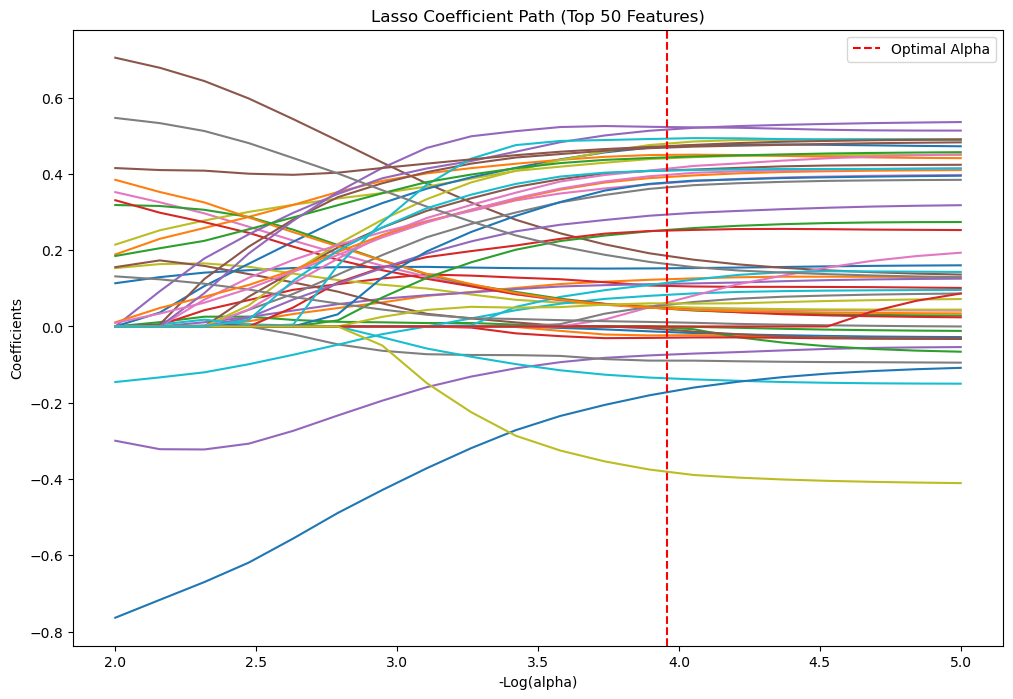

In [92]:
top_features = coefs_df_filtered_sorted.head(50)

# Extract feature names from the top_features DataFrame
selected_feature_names = top_features['Feature'].values

# Extract feature indices from the original dataset
feature_indices = [selected_feature_names.tolist().index(feature) for feature in selected_feature_names]

plt.figure(figsize=(12, 8))
plt.plot(-np.log10(alphas_lasso), coefs_lasso[feature_indices, :].T)
plt.axvline(x=-np.log10(optimal_alpha), color='red', linestyle='--', label='Optimal Alpha')
line_legend = Line2D([0], [0], color='red', linestyle='--', label='Optimal Alpha')
plt.xlabel("-Log(alpha)")
plt.ylabel("Coefficients")
plt.title("Lasso Coefficient Path (Top 50 Features)")
plt.legend(handles=[line_legend])
plt.savefig("lasso_coefficient_path.png")
plt.show()